Pandas the name stands for Python Data Analysis, 是一个数据处理包。这一章我们想了解南瓜在美国售价与月份的关系。首先，检查missing dates。任务一：1. 将日期转化为月份（数据中日期是MM/DD/YY）2.将月份提取成新的一列

pd.read.csv读取数据文档；.head 显示数据前5行

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


检查是否有missing data

In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

上面发现，date和price都没有缺少数据，接下来将目标数据外的数据全部舍弃

In [5]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

计算平均价格，提取出月份（DatetimeIndex.month自动识别出月份）。并重新构造去表格

In [7]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

但是我们发现在package中，出售一份的重量的单位是不同的，有些是bushel, 有些是per pumpkin, per pound。我们需要安装一个filter来只选择bushel。

In [9]:
new_pumpkins = new_pumpkins[new_pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


然后normalize 为 per bushel

In [10]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

接下来就是视觉化数据

In [11]:
import matplotlib.pyplot as plt

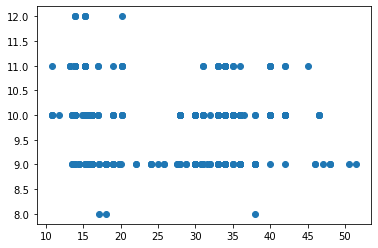

In [12]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

groupby([]).mean() (group mouth 这一列)计算了每一个月份的平均价格

Text(0, 0.5, 'Pumpkin Price')

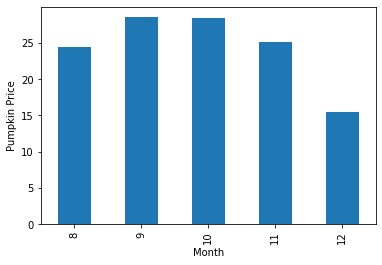

In [13]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

也可以用另一个画图包seaborn试一试

In [15]:
new_pumpkins.groupby(['Month'])['Price'].mean()

Month
8     24.366667
9     28.544384
10    28.355244
11    25.067213
12    15.412500
Name: Price, dtype: float64

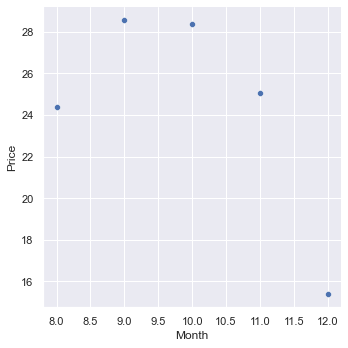

In [21]:
import seaborn as sns
sns.set_theme()
sns.relplot(
    data=new_pumpkins.groupby(['Month'])['Price'].mean()
)